# checking evolution reduction

In [1]:
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

In [2]:
from os import listdir

dirname = '../hyak_scp_dump/out_evo_reduction'
filenames = listdir(dirname)
tsvs = [filename for filename in filenames if (filename.endswith('.tsv') and 'test_preds' not in filename)]
tsvs


['CNN_cv0_r1.0_regularSeqs_pred_res.tsv',
 'CNN_cv0_r1.0_shuffleSeqs_pred_res.tsv']

In [3]:
df = pd.DataFrame()
for f in tsvs:
    df_new = pd.read_csv(f'{dirname}/{f}',sep='\t')
    df = pd.concat([df,df_new])
    
df

,model_name,split,r2,pearson,spearman,reduction,train_size,cv_fold,seq_mode,model_type
0,CNN_cv0_r1.0_regularSeqs,val,0.642166,0.802894,0.802764,1.0,673196,0,regular,CNN
1,CNN_cv0_r1.0_regularSeqs,test,0.647124,0.805938,0.805468,1.0,673196,0,regular,CNN
0,CNN_cv0_r1.0_shuffleSeqs,val,0.318991,0.564809,0.568338,1.0,673196,0,shuffle,CNN
1,CNN_cv0_r1.0_shuffleSeqs,test,0.321579,0.567175,0.570528,1.0,673196,0,shuffle,CNN


In [4]:
df['split'].value_counts()

test    2
val     2
Name: split, dtype: int64

In [5]:
df_test = df[df['split']=='test']
df_reg_test = df_test[df_test['seq_mode']=='regular']
df_shuff_test = df_test[df_test['seq_mode']=='shuffle']

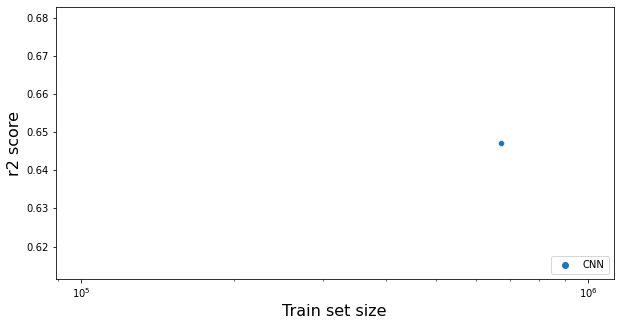

In [6]:
fig = plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=df_reg_test,x='train_size',y='r2',hue='model_type')
handles = ax.legend_.legendHandles[:]
labels = [text.get_text() for text in ax.legend_.texts][:]

sns.lineplot(data=df_reg_test,x='train_size',y='r2',hue='model_type',ci='sd')
plt.xscale('log')
#plt.xticks([1000,10000,100000,1000000])
plt.ylabel("r2 score",fontsize=16)
plt.xlabel("Train set size",fontsize=16)

plt.legend(handles, labels,loc='lower right')

plt.show()

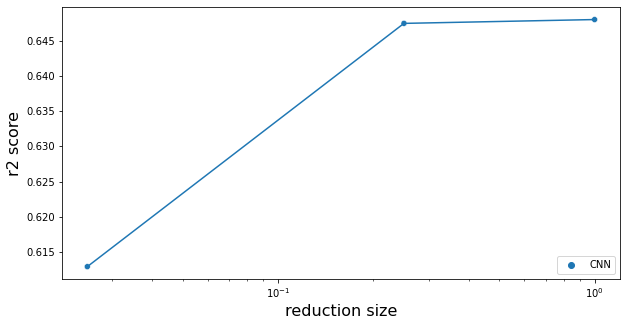

In [9]:
x_col='reduction'

fig = plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=df_reg_test,x=x_col,y='r2',hue='model_type')
handles = ax.legend_.legendHandles[:]
labels = [text.get_text() for text in ax.legend_.texts][:]

sns.lineplot(data=df_reg_test,x=x_col,y='r2',hue='model_type',ci='sd')
plt.xscale('log')
#plt.xticks([1000,10000,100000,1000000])
plt.ylabel("r2 score",fontsize=16)
plt.xlabel(f"{x_col} size",fontsize=16)

plt.legend(handles, labels,loc='lower right')

plt.show()

In [10]:
df_reg_test.groupby(['reduction','model_type']).mean().reset_index()

,reduction,model_type,r2,pearson,spearman,train_size,cv_fold
0,0.025,CNN,0.612914,0.783319,0.789027,16830,0
1,0.250,CNN,0.647485,0.807160,0.807163,168299,0
2,1.000,CNN,0.648029,0.808676,0.810266,673196,0


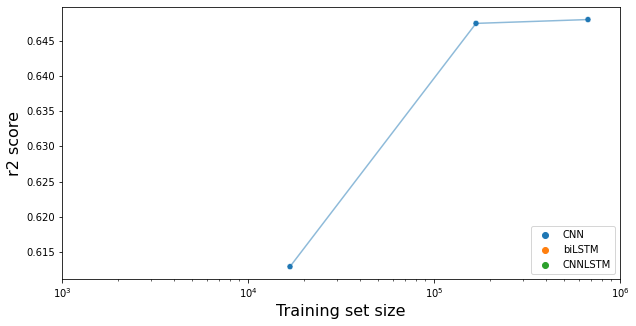

In [11]:
fig = plt.figure(figsize=(10,5))
hue_order = ['CNN','biLSTM','CNNLSTM']

ax = sns.scatterplot(data=df_reg_test.groupby(['reduction','model_type']).mean().reset_index(),
                x='train_size',y='r2',hue='model_type',hue_order=hue_order)

handles = ax.legend_.legendHandles[:]
labels = [text.get_text() for text in ax.legend_.texts][:]

sns.lineplot(data=df_reg_test,
             x='train_size',y='r2',hue='model_type',ci='sd',err_style='bars',
             alpha=0.5,hue_order=hue_order,err_kws={'capsize':5})

plt.xscale('log')
plt.xticks([1000,10000,100000,1000000])
plt.ylabel("r2 score",fontsize=16)
plt.xlabel("Training set size",fontsize=16)
plt.legend(handles, labels,loc='lower right')
plt.show()

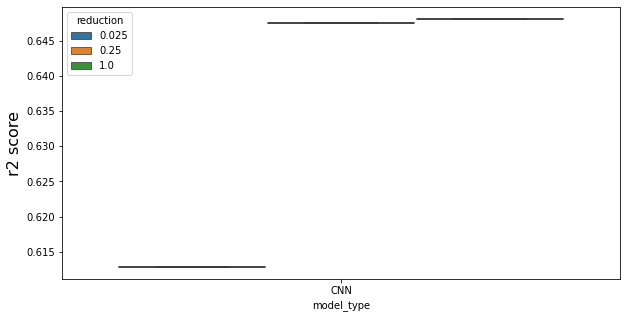

In [12]:
fig = plt.figure(figsize=(10,5))

sns.boxplot(data=df_reg_test,x='model_type',y='r2',hue='reduction',dodge=True)
#sns.lineplot(data=df_test,x='train_size',y='r2',hue='model_name',ci='sd')
#plt.xscale('log')
#plt.xticks([1000,10000,100000,1000000])
plt.ylabel("r2 score",fontsize=16)
plt.show()

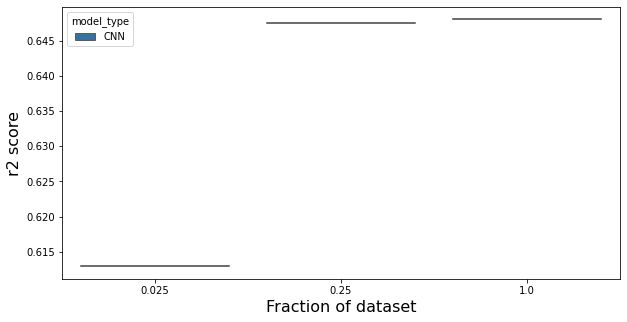

In [13]:
fig = plt.figure(figsize=(10,5))

sns.violinplot(data=df_reg_test,x='reduction',y='r2',hue='model_type',dodge=True)
#sns.lineplot(data=df_test,x='train_size',y='r2',hue='model_name',ci='sd')
#plt.xscale('log')
#plt.xticks([1000,10000,100000,1000000])
plt.ylabel("r2 score",fontsize=16)
plt.xlabel("Fraction of dataset",fontsize=16)

plt.show()

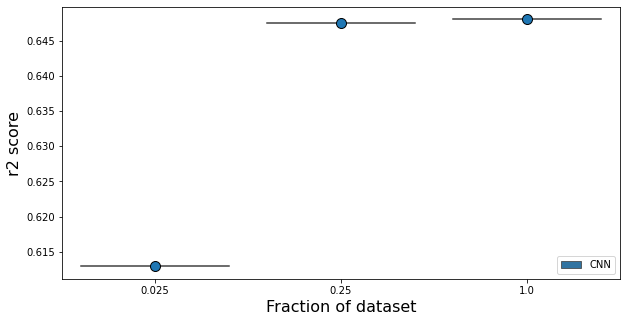

In [14]:
fig = plt.figure(figsize=(10,5))
ax = sns.violinplot(data=df_reg_test,x='reduction',y='r2',hue='model_type',dodge=True,legend=False)
plt.setp(ax.collections,alpha=0.3)

handles = ax.legend_.legendHandles
labels = [text.get_text() for text in ax.legend_.texts]

sns.swarmplot(data=df_reg_test,x='reduction',y='r2',hue='model_type',
              dodge=True,edgecolor='black',linewidth=1,ax=ax,size=10)

plt.legend(handles, labels,loc='lower right')

plt.ylabel("r2 score",fontsize=16)
plt.xlabel("Fraction of dataset",fontsize=16)
plt.show()

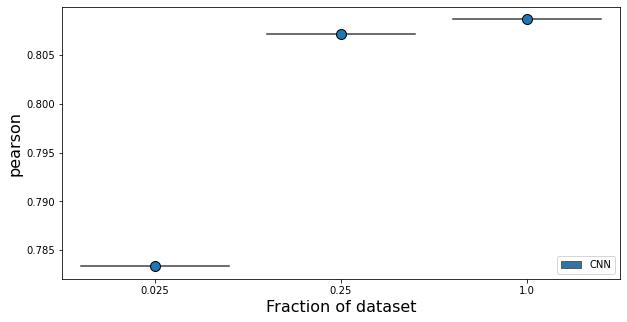

In [15]:
metric = 'pearson'
fig = plt.figure(figsize=(10,5))
ax = sns.violinplot(data=df_reg_test,x='reduction',y=metric,hue='model_type',dodge=True,legend=False)
plt.setp(ax.collections,alpha=0.3)

handles = ax.legend_.legendHandles
labels = [text.get_text() for text in ax.legend_.texts]

sns.swarmplot(data=df_reg_test,x='reduction',y=metric,hue='model_type',
              dodge=True,edgecolor='black',linewidth=1,ax=ax,size=10)

plt.legend(handles, labels,loc='lower right')

plt.ylabel(f'{metric}',fontsize=16)
plt.xlabel("Fraction of dataset",fontsize=16)
plt.show()

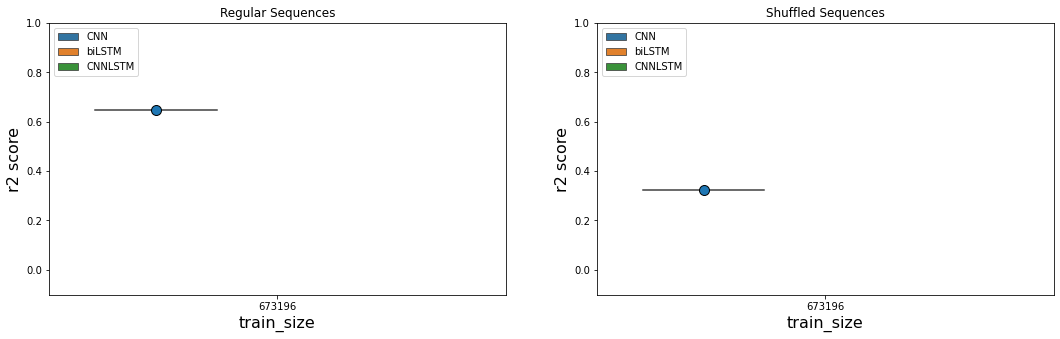

In [7]:
hue_order = ['CNN','biLSTM','CNNLSTM']

fig,axes = plt.subplots(1,2,figsize=(18,5))

x_col = 'train_size'

# Regular sequences
sns.violinplot(data=df_reg_test,x=x_col,y='r2',hue='model_type',
               dodge=True,legend=False,ax=axes[0], hue_order=hue_order)
plt.setp(axes[0].collections,alpha=0.3)

handles = axes[0].legend_.legendHandles
labels = [text.get_text() for text in axes[0].legend_.texts]

sns.swarmplot(data=df_reg_test,x=x_col,y='r2',hue='model_type',
              dodge=True,edgecolor='black',linewidth=1,ax=axes[0],hue_order=hue_order,size=10)

axes[0].legend(handles, labels,loc='upper left')
axes[0].set_ylim(-0.1,1.0)

axes[0].set_ylabel("r2 score",fontsize=16)
axes[0].set_xlabel(f"{x_col}",fontsize=16)
axes[0].set_title("Regular Sequences")

# Shuffled sequences
sns.violinplot(data=df_shuff_test,x=x_col,y='r2',hue='model_type',
               dodge=True,legend=False,ax=axes[1], hue_order=hue_order)
plt.setp(axes[1].collections,alpha=0.3)

handles = axes[1].legend_.legendHandles
labels = [text.get_text() for text in axes[1].legend_.texts]

sns.swarmplot(data=df_shuff_test,x=x_col,y='r2',hue='model_type',
              dodge=True,edgecolor='black',linewidth=1,ax=axes[1], hue_order=hue_order,size=10)
axes[1].legend(handles, labels,loc='upper left')
axes[1].set_ylim(-0.1,1.0)


axes[1].set_ylabel("r2 score",fontsize=16)
axes[1].set_xlabel(f"{x_col}",fontsize=16)
axes[1].set_title("Shuffled Sequences")
plt.show()

In [3]:
pred_df = pd.read_csv('../hyak_scp_dump/out_evo_reduction/CNN_cv0_r1.0_regularSeqs_test_preds.tsv',sep='\t')
pred_df

,og_index,truth,pred
0,8895955,5.0,5.405279
1,3891383,5.0,5.836980
2,18356667,6.0,5.839011
3,17185025,5.0,4.699891
4,14534653,11.0,8.720620
...,...,...,...
210369,8405019,14.0,11.548160
210370,8414940,3.0,5.713961
210371,1610914,11.0,9.383416
210372,15697517,13.0,9.853612


In [8]:
# x = pred_df['truth'].values
# y = pred_df['pred'].values

# r = scipy.stats.pearsonr(x ,y )
# sns.regplot(x=x ,y=y ,
#             scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
#             line_kws= {'linewidth':2} ,
#             color= '#0868ac', robust = 1 )

/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


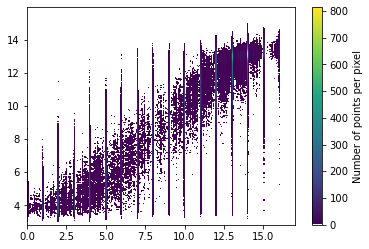

In [9]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

x = pred_df['truth'].values
y = pred_df['pred'].values
fig = plt.figure()
using_mpl_scatter_density(fig, x, y)
plt.show()

In [10]:
scipy.stats.pearsonr(x ,y )


(0.8059381525328746, 0.0)

## Mmk, let's load up the model

In [11]:
pred_df

,og_index,truth,pred
0,8895955,5.0,5.405279
1,3891383,5.0,5.836980
2,18356667,6.0,5.839011
3,17185025,5.0,4.699891
4,14534653,11.0,8.720620
...,...,...,...
210369,8405019,14.0,11.548160
210370,8414940,3.0,5.713961
210371,1610914,11.0,9.383416
210372,15697517,13.0,9.853612


In [4]:
test_locs = pred_df['og_index'].values

In [5]:
df = pd.read_csv('data/defined_media_traning_data_0.05sample.txt',sep='\t')
df

,og_index,seq,expression,shuffled_seq
0,16549025,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,9.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,8215705,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,10.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,11033062,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,14.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,17288351,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,13.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
4,4935440,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,9.737894,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
...,...,...,...,...
1051865,13227419,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,9.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1051866,7788040,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,14.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1051867,10820273,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,3.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1051868,10612659,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,13.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [6]:
df = df[df['og_index'].isin(test_locs)]
df

,og_index,seq,expression,shuffled_seq
6,1960648,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,5.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
9,8723130,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,15.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
15,10357127,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,13.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
37,1593368,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,14.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
39,10326003,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,14.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
...,...,...,...,...
1051855,6415543,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,8.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1051857,6693165,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,10.777596,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1051864,9239763,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,8.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1051867,10820273,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,3.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [7]:
split_dfs = {
    'test':df.sample(frac=0.25),   
}

In [8]:
seq_len = len(df['seq'].values[0])
seq_len

300

# Restart

In [2]:
import torch
from torch import nn

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

import time

import models as m
import utils as u
import torch_utils as tu
from torch_utils import DatasetSpec
import viz as v

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#DEVICE = torch.device('cpu')
DEVICE

device(type='cuda')

In [3]:
torch.cuda.is_available()

True

In [4]:
ev_test_df = pd.read_csv('data/Random_test_gpu_model_defined_media.csv',sep=',',index_col=0)
ev_test_df

,sequence,Measured Expression,Predicted Expression
0,TGCATTTTTTTCACATCAAAAGTAGGTTCTTGCAGCATTCTGATGC...,8.735497,6.359788
1,TGCATTTTTTTCACATCAAAAGTTGTGTGAGAGGGGACCCATTAGT...,6.618866,6.136452
2,TGCATTTTTTTCACATCAAAAGTTTCAACTCACCCGTCACTTCGTA...,12.030058,11.752416
3,TGCATTTTTTTCACATCAAAATTATGCGGGGGCTGATAACGATCAA...,8.269035,7.441137
4,TGCATTTTTTTCACATCAAAATTGGGAGTGGATCATACCTTTAGTA...,6.305435,6.332765
...,...,...,...
5284,TGCATTTTTTTCACATCTTTTTTGCAGGAGTCTGTGGGTACACGAA...,8.448993,7.261795
5285,TGCATTTTTTTCACATCTTTTTTGCTTGGATCGAGTTTTTTCATCG...,10.298867,10.226810
5286,TGCATTTTTTTCACATCTTTTTTGTTTATATCTATTGTACGTTCGG...,9.840540,8.562830
5287,TGCATTTTTTTCACATCTTTTTTTCGATCCTAGGGTCTAGCGTTTG...,11.766798,10.931674


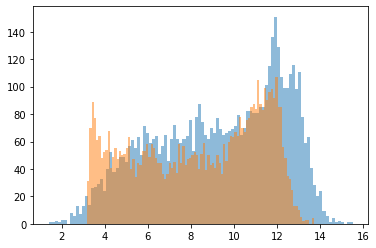

In [5]:
plt.hist(ev_test_df['Measured Expression'].values,bins=100,alpha=0.5)
plt.hist(ev_test_df['Predicted Expression'].values,bins=100,alpha=0.5)
plt.show()

In [6]:
# double check sequence lengths
print("min:",min([len(x) for x in ev_test_df['sequence'].values]))
print("max:",max([len(x) for x in ev_test_df['sequence'].values]))

min: 110
max: 110


In [7]:
# For now, bump all sequences to length 127
def fill_seq(seq,length):
    if len(seq) < length:
        num_ns = length - len(seq)
        ns = ''.join(["N" for x in range(num_ns)])
        return ns + seq
    elif len(seq) > length:
        raise ValueError(f"Length of seq is longer than {length} (is {len(seq)}).")
    else:
        return seq

In [8]:
ev_test_df['seq'] = ev_test_df['sequence'].apply(lambda x: fill_seq(x,300))
ev_test_df

,sequence,Measured Expression,Predicted Expression,seq
0,TGCATTTTTTTCACATCAAAAGTAGGTTCTTGCAGCATTCTGATGC...,8.735497,6.359788,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,TGCATTTTTTTCACATCAAAAGTTGTGTGAGAGGGGACCCATTAGT...,6.618866,6.136452,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,TGCATTTTTTTCACATCAAAAGTTTCAACTCACCCGTCACTTCGTA...,12.030058,11.752416,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,TGCATTTTTTTCACATCAAAATTATGCGGGGGCTGATAACGATCAA...,8.269035,7.441137,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
4,TGCATTTTTTTCACATCAAAATTGGGAGTGGATCATACCTTTAGTA...,6.305435,6.332765,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
...,...,...,...,...
5284,TGCATTTTTTTCACATCTTTTTTGCAGGAGTCTGTGGGTACACGAA...,8.448993,7.261795,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
5285,TGCATTTTTTTCACATCTTTTTTGCTTGGATCGAGTTTTTTCATCG...,10.298867,10.226810,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
5286,TGCATTTTTTTCACATCTTTTTTGTTTATATCTATTGTACGTTCGG...,9.840540,8.562830,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
5287,TGCATTTTTTTCACATCTTTTTTTCGATCCTAGGGTCTAGCGTTTG...,11.766798,10.931674,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [9]:
ev_test_df['expression'] = ev_test_df['Measured Expression']
ev_test_df['og_index'] = ev_test_df.index
ev_test_df

,sequence,Measured Expression,Predicted Expression,seq,expression,og_index
0,TGCATTTTTTTCACATCAAAAGTAGGTTCTTGCAGCATTCTGATGC...,8.735497,6.359788,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,8.735497,0
1,TGCATTTTTTTCACATCAAAAGTTGTGTGAGAGGGGACCCATTAGT...,6.618866,6.136452,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,6.618866,1
2,TGCATTTTTTTCACATCAAAAGTTTCAACTCACCCGTCACTTCGTA...,12.030058,11.752416,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,12.030058,2
3,TGCATTTTTTTCACATCAAAATTATGCGGGGGCTGATAACGATCAA...,8.269035,7.441137,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,8.269035,3
4,TGCATTTTTTTCACATCAAAATTGGGAGTGGATCATACCTTTAGTA...,6.305435,6.332765,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,6.305435,4
...,...,...,...,...,...,...
5284,TGCATTTTTTTCACATCTTTTTTGCAGGAGTCTGTGGGTACACGAA...,8.448993,7.261795,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,8.448993,5284
5285,TGCATTTTTTTCACATCTTTTTTGCTTGGATCGAGTTTTTTCATCG...,10.298867,10.226810,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,10.298867,5285
5286,TGCATTTTTTTCACATCTTTTTTGTTTATATCTATTGTACGTTCGG...,9.840540,8.562830,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,9.840540,5286
5287,TGCATTTTTTTCACATCTTTTTTTCGATCCTAGGGTCTAGCGTTTG...,11.766798,10.931674,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,11.766798,5287


In [18]:
ev_test_df.to_csv('data/vaishnav_test_set_random_defined_media_300bp.tsv',sep='\t',index=False)

(0.9684701043349309, 0.0)


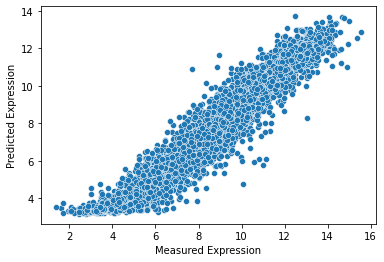

In [10]:
print(scipy.stats.pearsonr(ev_test_df['Measured Expression'].values ,ev_test_df['Predicted Expression'].values ))
sns.scatterplot(data=ev_test_df,x='Measured Expression',y='Predicted Expression')
plt.show()

In [11]:
train_df = pd.read_csv('data/hyak_temp/train_df.tsv',sep='\t')
# val_df = pd.read_csv('data/hyak_temp/val_df.tsv',sep='\t')
test_df = pd.read_csv('data/hyak_temp/test_df.tsv',sep='\t')
seq_len = len(test_df['seq'].values[0])

test_df

,index,og_index,seq,expression,shuffled_seq
0,519072,8895955,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,5.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,349863,3891383,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,5.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,825860,18356667,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,6.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,237553,17185025,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,5.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
4,24068,14534653,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,11.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
...,...,...,...,...,...
210369,603992,8405019,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,14.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
210370,534216,8414940,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,3.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
210371,1033671,1610914,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,11.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
210372,413892,15697517,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,13.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [12]:
seq_len

300

In [13]:
#model_re = m.DNA_2CNN_2FC(*m_args,**m_kwargs)
# model_re = m.DNA_2CNN_2FC(
#     127,#seq_len,
#     num_classes=1, # num tasks
#     num_filters1=32,
#     num_filters2=32,
# #     kernel_size1=10,
# #     kernel_size2=6,
#     kernel_size1=8,
#     kernel_size2=8,
#     #conv_pool_size1=2,
# #     fc_node_num1=50,
# #     fc_node_num2=50,
#     fc_node_num1=10,
#     fc_node_num2=10,
#     dropout1=0.25
# )

#model_re.load_state_dict(torch.load('OLD_out_evo_reduction/CNN_cv0_r0.025_regularSeqs_model_state_dict.pt'))


model_re = m.DNA_2CNN_2FC(
    seq_len,
    num_classes=1, # num tasks
    num_filters1=32,
    num_filters2=32,
    kernel_size1=10,
    kernel_size2=6,
    conv_pool_size1=2,
    fc_node_num1=50,
    fc_node_num2=50,
    dropout1=0.25
)

#model_re.load_state_dict(torch.load('../hyak_scp_dump/out_evo_reduction_127bp/CNN_cv0_r1.0_regularSeqs_model_state_dict.pt'))
model_re.load_state_dict(torch.load('saved_models/rtx3_model_state_dict.pt'))

<All keys matched successfully>

In [14]:
model_re

DNA_2CNN_2FC(
  (conv_net): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 10), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.25, inplace=False)
    (4): Conv2d(32, 32, kernel_size=(1, 6), stride=(1, 1))
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Flatten()
    (8): Linear(in_features=4480, out_features=50, bias=True)
    (9): ReLU()
    (10): Linear(in_features=50, out_features=50, bias=True)
    (11): ReLU()
    (12): Linear(in_features=50, out_features=1, bias=True)
  )
)

test split


/home/ubuntu/workspace/mbur-sequence-learning/torch_utils.py:939: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['truth'] = df[target_col]


Predicting for reloaded 1M model


/home/ubuntu/workspace/mbur-sequence-learning/torch_utils.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['pred'] = [x[0] for x in preds]


Saved test predictions to data/hyak_temp/rtx3_test_preds.tsv
evo split


/home/ubuntu/workspace/mbur-sequence-learning/torch_utils.py:939: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['truth'] = df[target_col]


Predicting for reloaded 1M model


/home/ubuntu/workspace/mbur-sequence-learning/torch_utils.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['pred'] = [x[0] for x in preds]


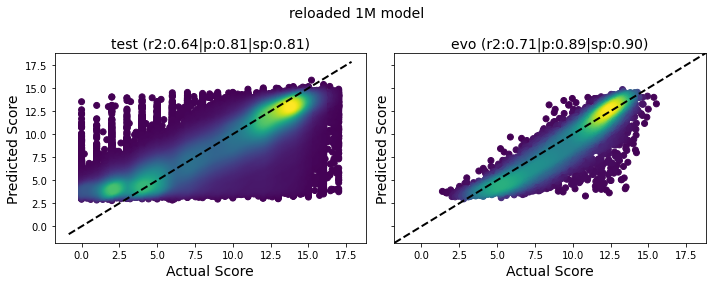

In [14]:
split_dfs = {
#     'train':train_df.sample(frac=0.025),
#     'val':val_df.sample(frac=0.25),
    'test':test_df, 
    'evo': ev_test_df
}

p_res_df = tu.parity_pred_by_split(
        model_re.to(DEVICE),
        "reloaded 1M model",
        DEVICE,
        split_dfs,
        locus_col='og_index',
        seq_col='seq',
        target_col='expression',
        splits=['test','evo'],
        save_test_preds='data/hyak_temp/rtx3_test_preds.tsv'
        #save_file=f"{out_dir}/{model_name}_parity_plot.png"
    )

train split


/home/ubuntu/workspace/mbur-sequence-learning/torch_utils.py:939: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['truth'] = df[target_col]


Predicting for reloaded 1M model


/home/ubuntu/workspace/mbur-sequence-learning/torch_utils.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['pred'] = [x[0] for x in preds]


test split


/home/ubuntu/workspace/mbur-sequence-learning/torch_utils.py:939: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['truth'] = df[target_col]


Predicting for reloaded 1M model


/home/ubuntu/workspace/mbur-sequence-learning/torch_utils.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['pred'] = [x[0] for x in preds]


evo split


/home/ubuntu/workspace/mbur-sequence-learning/torch_utils.py:939: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['truth'] = df[target_col]


Predicting for reloaded 1M model


/home/ubuntu/workspace/mbur-sequence-learning/torch_utils.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['pred'] = [x[0] for x in preds]


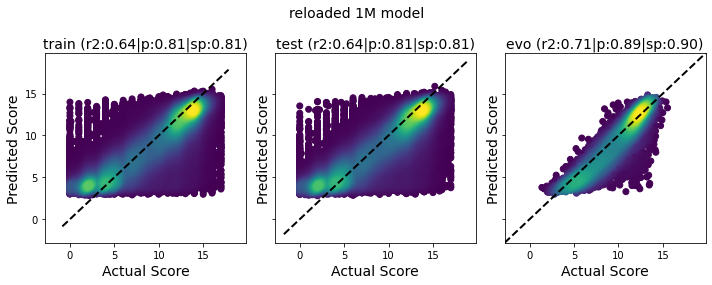

In [15]:
split_dfs = {
    'train':train_df.sample(frac=0.5),
    #'val':val_df,
    'test':test_df, 
    'evo': ev_test_df
}

p_res_df = tu.parity_pred_by_split(
        model_re.to(DEVICE),
        "reloaded 1M model",
        DEVICE,
        split_dfs,
        locus_col='og_index',
        seq_col='seq',
        target_col='expression',
        splits=['train','test','evo'],
        #save_file=f"{out_dir}/{model_name}_parity_plot.png"
    )

In [16]:
1+1

2